In [2]:
import geopandas
from geodatasets import get_path

path_to_data = get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

Extracting 'nybb_16a/nybb.shp' from 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\HP\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


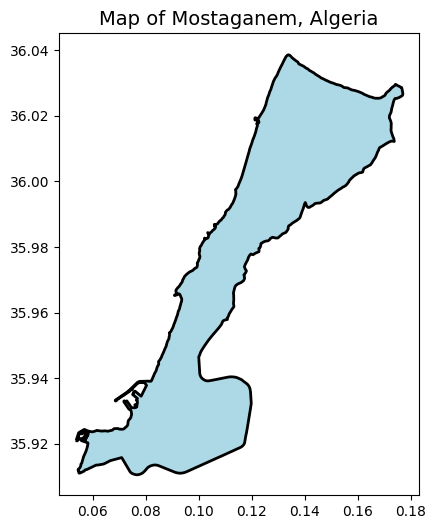

In [3]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Get the boundary of Mostaganem
city = "Mostaganem, Algeria"
gdf = ox.geocode_to_gdf(city)

# Plot the boundary
fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=2)
ax.set_title(f"Map of {city}", fontsize=14)
plt.show()


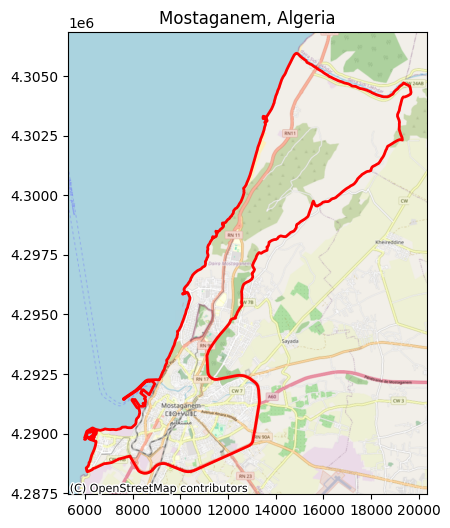

In [4]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(8, 6))
gdf.to_crs(epsg=3857).plot(ax=ax, color="none", edgecolor="red", linewidth=2)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Use OpenStreetMap
plt.title(f"Mostaganem, Algeria")
plt.show()


In [5]:
import folium

# Coordinates for Mostaganem, Algeria
mostaganem_coords = [35.9372, 0.0895]

# Create a folium map centered on Mostaganem
m = folium.Map(location=mostaganem_coords, zoom_start=12)

# Show the map
m


In [6]:
# Add a marker for a famous location (e.g., Salamandre Beach)
folium.Marker(
    location=[35.9405, 0.1049],  # Approximate location of Salamandre Beach
    popup="Salamandre Beach",
    tooltip="Click for more info",
    icon=folium.Icon(color="blue", icon="cloud")
).add_to(m)

# Add another marker (e.g., Place du 1er Novembre)
folium.Marker(
    location=[35.9326, 0.0915],  
    popup="Place du 1er Novembre",
    tooltip="Historical Square",
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(m)

# Show the updated map
m


In [7]:
from folium.plugins import HeatMap
import numpy as np

# Generate random locations around Mostaganem for example purposes
heat_data = [[35.9372 + np.random.uniform(-0.01, 0.01), 
              0.0895 + np.random.uniform(-0.01, 0.01)] for _ in range(50)]

# Add heatmap
HeatMap(heat_data).add_to(m)

# Show the map with heatmap
m


In [9]:
import folium
import numpy as np
import pandas as pd
from folium.plugins import HeatMapWithTime

# Step 1: Create a base map centered on Mostaganem
mostaganem_coords = [35.9372, 0.0895]  # Mostaganem, Algeria
m = folium.Map(location=mostaganem_coords, zoom_start=13)

# Step 2: Simulate epidemic spread over 10 days
np.random.seed(42)  # Ensure reproducibility
days = 10  # Number of time steps (days)
cases_per_day = 20  # Number of new infection locations per day

# Generate random infection locations around Mostaganem for each day
infection_data = [
    [[35.9372 + np.random.uniform(-0.01, 0.01),  # Latitude
      0.0895 + np.random.uniform(-0.01, 0.01)]   # Longitude
     for _ in range(cases_per_day)]
    for _ in range(days)
]

# Step 3: Add animated heatmap to map
HeatMapWithTime(infection_data, index=list(range(1, days+1)), name="Epidemic Spread").add_to(m)

# Step 4: Show the map
m


In [10]:
import folium

# Mostaganem Base Map
mostaganem_coords = [35.9372, 0.0895]
m = folium.Map(location=mostaganem_coords, zoom_start=13)

# List of Hospitals & Quarantine Centers
hospitals = [
    {"name": "Mostaganem University Hospital", "lat": 35.9404, "lon": 0.0866},
    {"name": "Mostaganem Regional Hospital", "lat": 35.9485, "lon": 0.0879},
    {"name": "Sidi Belattar Clinic", "lat": 35.9310, "lon": 0.0807},
    {"name": "Quarantine Center - Hotel", "lat": 35.9380, "lon": 0.0960}
]

# Add markers to the map
for hospital in hospitals:
    folium.Marker(
        location=[hospital["lat"], hospital["lon"]],
        popup=hospital["name"],
        tooltip="Click for details",
        icon=folium.Icon(color="red", icon="plus-sign")  # Red for medical facilities
    ).add_to(m)

m  # Display the map with hospitals


In [11]:
import numpy as np
import pandas as pd
from folium.plugins import HeatMapWithTime

# Simulated COVID-19 case data for 10 days
days = 10  # Number of days to simulate
cases_per_day = [5, 10, 15, 25, 35, 40, 50, 55, 60, 70]  # Increasing cases each day

# Manually entered case locations (or you can load from an official dataset)
real_cases = [
    [35.9372 + np.random.uniform(-0.01, 0.01), 
     0.0895 + np.random.uniform(-0.01, 0.01)] 
    for _ in range(sum(cases_per_day))
]

# Organize cases into daily timeframes
case_progression = []
index = 0
for day_cases in cases_per_day:
    case_progression.append(real_cases[index:index+day_cases])
    index += day_cases

# Add heatmap animation
HeatMapWithTime(case_progression, index=list(range(1, days+1)), name="COVID-19 Spread").add_to(m)

m  # Display the updated map


In [12]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import HeatMapWithTime, MarkerCluster

# Load the CSV file
df = pd.read_csv("cases.csv")

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Get the unique dates (time progression)
time_index = sorted(df["date"].unique())

# Convert case data into time steps for heatmap animation
heatmap_data = []
for date in time_index:
    daily_cases = df[df["date"] == date][["latitude", "longitude"]].values.tolist()
    heatmap_data.append(daily_cases)

# Create Mostaganem Base Map
mostaganem_coords = [35.9372, 0.0895]
m = folium.Map(location=mostaganem_coords, zoom_start=13)

# Add animated heatmap
HeatMapWithTime(heatmap_data, index=[str(d)[:10] for d in time_index], name="Epidemic Spread").add_to(m)

m  # Show the updated map


In [13]:
from folium.plugins import MarkerCluster

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add cases to the cluster
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Date: {row['date'].strftime('%Y-%m-%d')}",
        tooltip="Click for details",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(marker_cluster)

m  # Show the map with clustering

In [15]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import HeatMap

# Load the case data
df = pd.read_csv("cases.csv")

# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Count the number of cases per location
case_counts = df.groupby(["latitude", "longitude"]).size().reset_index(name="cases")

# Create a function to define risk levels for heatmap intensity
def get_intensity(cases):
    if cases <= 2:
        return 0.3  # 🟢 Green (Safe area)
    elif cases <= 5:
        return 0.6  # 🟠 Orange (Moderate risk)
    else:
        return 1.0  # 🔴 Red (High risk)

# Add an intensity column for heatmap
case_counts["intensity"] = case_counts["cases"].apply(get_intensity)

# Create the base map centered on Mostaganem
mostaganem_coords = [35.9372, 0.0895]
m = folium.Map(location=mostaganem_coords, zoom_start=13)

# Prepare data for heatmap [(lat, lon, intensity)]
heatmap_data = list(zip(case_counts["latitude"], case_counts["longitude"], case_counts["intensity"]))

# Add heatmap layer to the map
HeatMap(heatmap_data, radius=30, blur=15, min_opacity=0.4).add_to(m)

# Display the map
m


In [16]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import HeatMapWithTime

# Load the CSV file
df = pd.read_csv("cases.csv")

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Get the unique dates (sorted)
unique_dates = sorted(df["date"].unique())

# Prepare heatmap data for each day
heatmap_data = []
for date in unique_dates:
    daily_cases = df[df["date"] == date][["latitude", "longitude"]].values.tolist()
    heatmap_data.append(daily_cases)

# Create the base map centered on Mostaganem
mostaganem_coords = [35.9372, 0.0895]
m = folium.Map(location=mostaganem_coords, zoom_start=13)

# Add animated heatmap
HeatMapWithTime(heatmap_data, index=[str(d)[:10] for d in unique_dates], name="Epidemic Spread").add_to(m)

# Export to an HTML file
html_filename = "epidemic_map.html"
m.save(html_filename)

# Show confirmation message
html_filename


'epidemic_map.html'

In [18]:
# import geopandas as gpd
# import folium
# import pandas as pd
# from folium.plugins import HeatMap

# # Load commune boundaries (GeoJSON)
# communes = gpd.read_file("mostaganem_communes.geojson")

# # Load epidemic case data
# cases = pd.read_csv("cases.csv")

# # Merge case data with commune polygons
# merged_data = communes.merge(cases, on="commune_name")
